# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?id=524901&appid=f8727b76232ec110d7e8f9b7fa152c19"
units = "metric"
query_url=f"{url}appid=f8727b76232ec110d7e8f9b7fa152c19&units={units}&q="
#query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(url)
response.status_code
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?id=524901&appid=f8727b76232ec110d7e8f9b7fa152c19"
query_url=f"{url}appid=89ccafb3a1f4d4c1a5b2fec24562f2b6&units={units}&q="
#query_url = url + "appid=" + weather_api_key + "&q=" + city
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | galesong
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | daxian
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | santa flavia
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | turukhansk
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | burica
City not found. Skipping...
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | redwater
Processing Record 19 of Set 1 | cacoal
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | grand gaube
Processing Record 22 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#regression df fields 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
cloudiness = city_data_df["Cloudiness"]
humidity = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]


# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-20.4081,57.7000,299.40,79,22,7.81,MU,1675801111
1,galesong,-5.3166,119.3661,297.16,80,99,2.93,ID,1675801112
2,saldanha,-33.0117,17.9442,291.66,90,71,10.42,ZA,1675801115
3,bluff,-46.6000,168.3333,282.48,64,80,11.96,NZ,1675801116
4,santa flavia,38.0850,13.5351,281.00,71,79,3.05,IT,1675801118


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahebourg,-20.4081,57.7000,299.40,79,22,7.81,MU,1675801111
1,galesong,-5.3166,119.3661,297.16,80,99,2.93,ID,1675801112
2,saldanha,-33.0117,17.9442,291.66,90,71,10.42,ZA,1675801115
3,bluff,-46.6000,168.3333,282.48,64,80,11.96,NZ,1675801116
4,santa flavia,38.0850,13.5351,281.00,71,79,3.05,IT,1675801118


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

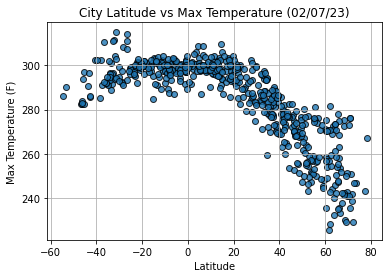

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,edgecolor="black",linewidth =1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (%s)"% time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

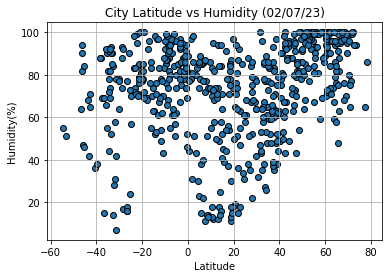

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (%s)"% time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

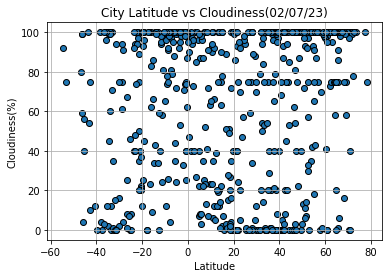

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o")


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(%s)"% time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

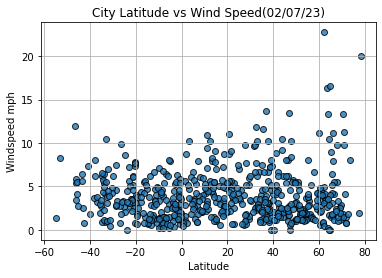

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(%s)"% time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title, text_coordinates):

    (slope, intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =  " + str(round(slope,2)) +"x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)

    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize = 15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,santa flavia,38.0850,13.5351,281.00,71,79,3.05,IT,1675801118
6,georgetown,5.4112,100.3354,297.18,89,87,3.60,MY,1675800872
8,guerrero negro,27.9769,-114.0611,293.47,22,1,1.13,MX,1675801120
10,nanortalik,60.1432,-45.2371,258.75,70,41,11.16,GL,1675801121
12,turukhansk,65.8167,87.9833,258.20,96,100,3.06,RU,1675801122


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahebourg,-20.4081,57.7000,299.40,79,22,7.81,MU,1675801111
1,galesong,-5.3166,119.3661,297.16,80,99,2.93,ID,1675801112
2,saldanha,-33.0117,17.9442,291.66,90,71,10.42,ZA,1675801115
3,bluff,-46.6000,168.3333,282.48,64,80,11.96,NZ,1675801116
5,yulara,-25.2406,130.9889,298.61,24,0,2.66,AU,1675801119


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8688707897848722


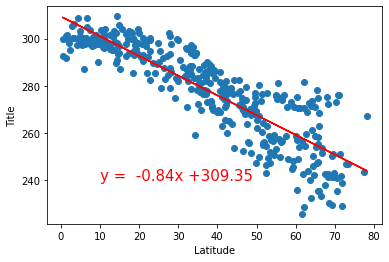

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp",(10,240))

The r-squared is: 0.3069557020357106


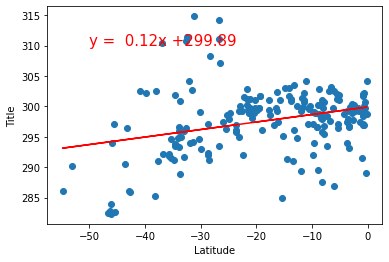

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp",(-50,310))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.49399847809633785


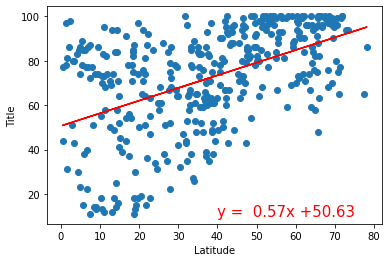

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity",(40,10))

The r-squared is: 0.3113671652335759


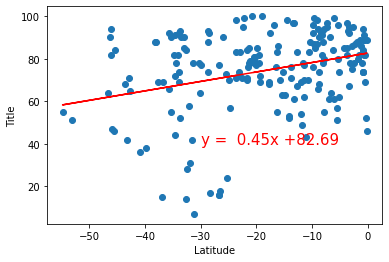

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity",(-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2365938317453758


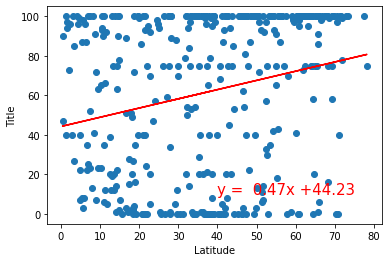

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness",(40,10))

The r-squared is: 0.32283579963253234


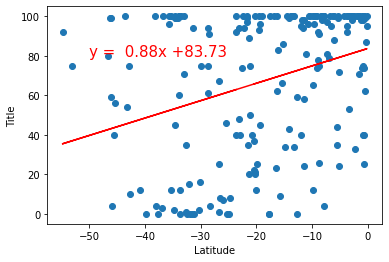

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness",(-50,80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008865243286500148


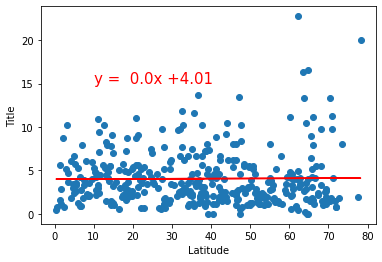

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Windspeed",(10,15))

The r-squared is: -0.289069354339647


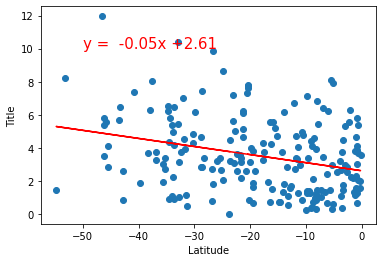

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed",(-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE